<a href="https://colab.research.google.com/github/Noks06/Prediction-of-Product-Sales/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales -Predictions
 by Nokuthula Mchunu

In [350]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [351]:
# Loading Data
import pandas as pd
df_prediction = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
# preview dataframe info
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [352]:
# preview top 5 rows
df_prediction.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [353]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. There are 8523 rows and and 12 columns

2. There are 4 floats, 1 int and 4 objects

In [354]:
# Checking duplicate
df_prediction.duplicated().sum()

0

In [355]:
# Identifying Missing Values
df_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [356]:
# checking Item_Weight datatype
df_prediction['Item_Weight'].dtype

dtype('float64')

In [357]:
# checking Item_Weight datatype
df_prediction['Outlet_Size'].dtype

dtype('O')

In [358]:
# Filling the missing value in 'Item_Weight' with -1
df_prediction['Item_Weight'] =df_prediction['Item_Weight'].fillna(-1)


In [359]:
# Filling the missing value in 'Outlet_Size' with Missing
df_prediction['Outlet_Size'] =df_prediction['Outlet_Size'].fillna('Missing')


In [360]:
# Checking iif there are any missing values
df_prediction.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [361]:
# Checking for any consistancy of the data  in dataframe
incon_column =df_prediction.select_dtypes('object').columns
incon_column
# using for loop to loop through list of columns
for lnames in incon_column:
  print(df_prediction[lnames].value_counts())
  print(" ")

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Mediu

In [362]:
# Removing inconsistance
df_prediction['Item_Fat_Content'] =df_prediction['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
df_prediction['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [363]:
# Obtaing Summary statistics for numerical values
num_values = incon_column =df_prediction.select_dtypes('number').columns



In [364]:
# using for loop to run through columns
for num_v in num_values:
  print(f"{df_prediction[num_v]} has min={df_prediction[num_v].min()}, max={df_prediction[num_v].max()} and mean={df_prediction[num_v].mean()}")
  print(" ")

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64 has min=-1.0, max=21.35 and mean=10.478936407368296
 
0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64 has min=0.0, max=0.328390948 and mean=0.06613202877895108
 
0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64 has min=31.29, max=266.8884 and mean=140.9927819781767
 
0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Na

# Project 1 Part 3 (Core) wk 3

In [365]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [366]:
# Getting Statistical analysis
df_prediction.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [367]:
df_prediction.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [368]:
# Viewing the top 5 data in dataset
df_prediction.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Explore Item_outlet_Sales

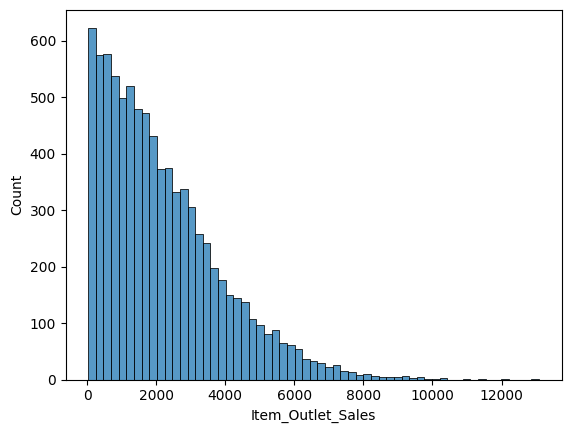

In [369]:
# importing  important libralies

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

ax1 = sbn.histplot(data = df_prediction, x ='Item_Outlet_Sales')


## Explore Item_fat Content vs Item_outlet_Sales

Text(0.5, 1.0, 'Item_Fat_Content vs Item_Outlet_Sales')

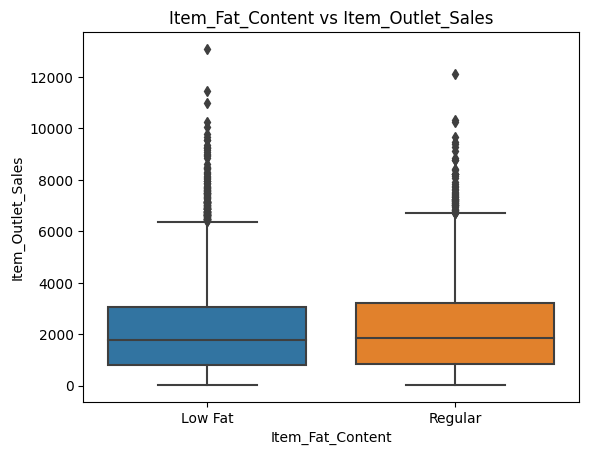

In [370]:
# using seaborn boxplot to
ax2 = sbn.boxplot(data = df_prediction, x='Item_Fat_Content',y ='Item_Outlet_Sales')
ax2.set_title('Item_Fat_Content vs Item_Outlet_Sales')

The outcome that we see in the above graph shows that between Low Fat and Regular content there are no difference except for the outliers that shows little difference

## Explore Item_Type

Text(0.5, 1.0, 'Distribution of Item Type')

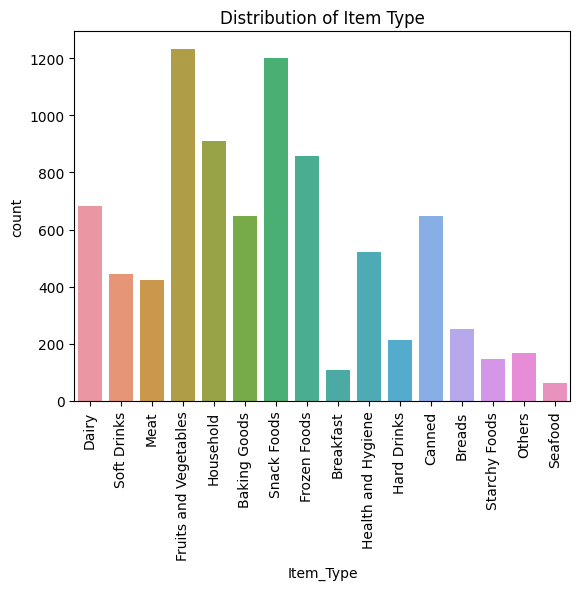

In [371]:
# Using Countplot to explore Item_Type

ax3 = sbn.countplot(data =df_prediction, x ='Item_Type')
ax3.tick_params(axis ='x', rotation =90 )
ax3.set_title('Distribution of Item Type')

The graph above shows that Fruit and Vegitables are highly distributed among the Item_Type meanwhile seafood has a low distribution.

## Viewing The correlation Between Features

In [372]:
# Using view the correlation
cor = df_prediction.corr()
cor.round(2)

<ipython-input-372-b1ac50b9a45c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_prediction.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


Text(0.5, 1.0, 'Correlation features')

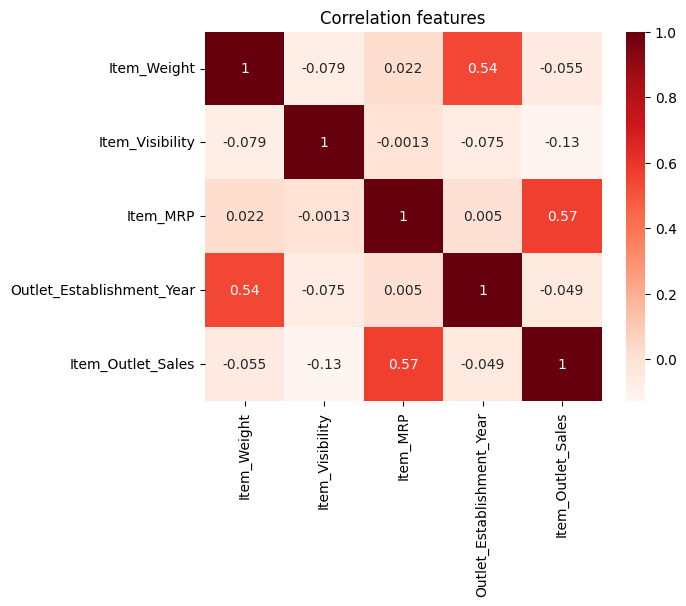

In [373]:
# using seaborn heatmap to view the correlation
ax4 = sbn.heatmap(cor,cmap ='Reds', annot =True)
ax4.set_title('Correlation features')

The above correlation shows that Item_Outlet_Sales have a stronger correlation to Item_MRP followed by  Outlet_Establishment to Item_Weight while Item_visibility to Item_OutletSales have the weekest Correlation.

Text(0.5, 1.0, 'Outlet size vs Outlet sales')

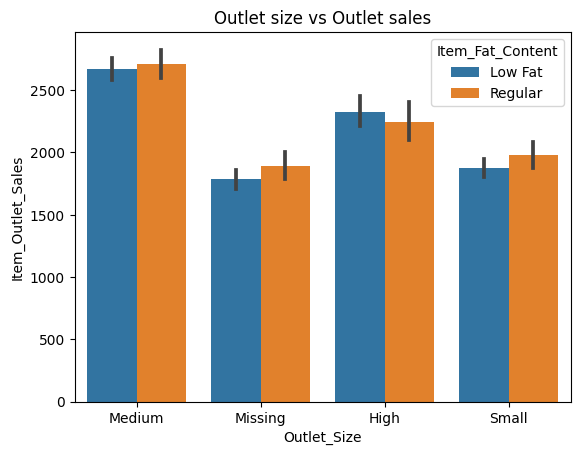

In [374]:
ax5 = sbn.barplot(data =df_prediction, x ='Outlet_Size',y='Item_Outlet_Sales', hue ='Item_Fat_Content')
ax5.set_title('Outlet size vs Outlet sales')

The above graph show that Medium outlet has the highest sales .

# Sales Predictions Project 1 - Part4

In [375]:
# Removing placeholder -1 and replace it with NaN
df_prediction['Item_Weight'] =df_prediction['Item_Weight'].replace({-1:np.nan})


In [376]:
# Re-checking missing values
df_prediction['Item_Weight'].isna().sum()

1463

In [377]:
df_prediction['Item_Weight'].dtype

dtype('float64')

In [378]:
# Removing placeholder Missing and putting back null
df_prediction['Outlet_Size'] =df_prediction['Outlet_Size'].replace({'Missing':np.nan})


In [379]:
# droping Item_Identifier, Item Type from the dataframe

predictlist  =['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type','Item_Outlet_Sales']
df =df_prediction[predictlist]
df



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Dairy,3735.1380
1,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Soft Drinks,443.4228
2,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Meat,2097.2700
3,19.200,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,Fruits and Vegetables,732.3800
4,8.930,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Household,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,Snack Foods,2778.3834
8519,8.380,Regular,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,Baking Goods,549.2850
8520,10.600,Low Fat,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,Health and Hygiene,1193.1136
8521,7.210,Regular,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,Snack Foods,1845.5976


In [380]:
#Removing a placeholder and
df_prediction['Outlet_Size'].isna().sum()

2410

## EDA Functions from Lessons

### Univariate EDA Functions

In [381]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [382]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [383]:
#Checking the uniqueness of the fetures
df.nunique()



Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Type                      16
Item_Outlet_Sales            3493
dtype: int64

## Item_Weight  
Feature - Item_Weight
Description - 	Weight of product              

In [384]:
#checking data type of Item_Weight
df['Item_Weight'].dtype

dtype('float64')

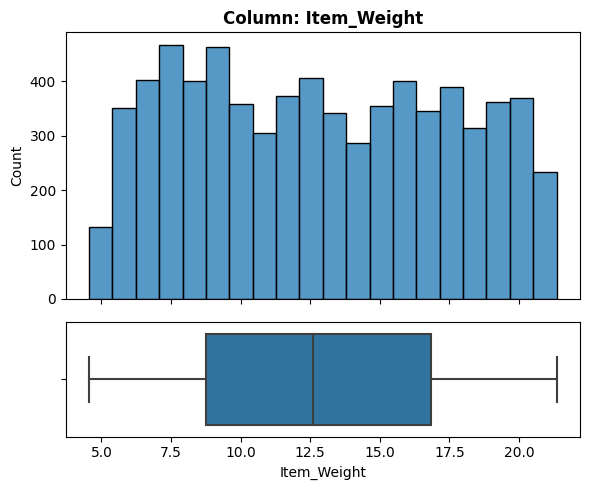

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [385]:
# Ploting univarientgraph for Item_Identifier
explore_numeric(df, 'Item_Weight')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * *Numeric*

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * *1463 null values with 17.17%*

* Is the feature constant or quasi-constant?
  * *It is not constant or quasi-constant*

* What is the cardinality? Is it high (>10)?
  * *It is a numeric feature so it is not relevent*


* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
  * Yes, Item_weight will not determine the increase or decrease of the Item sale

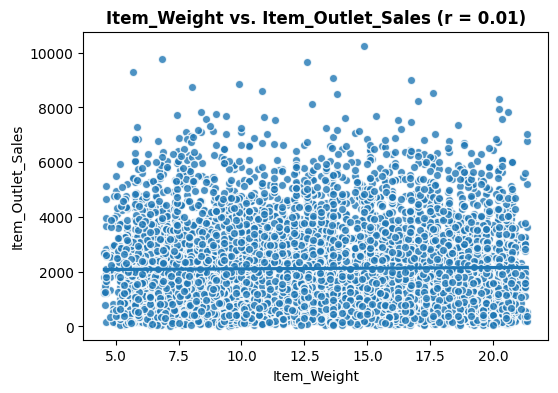

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [386]:
# Ploting Multivariate Item_Weight vs target(Outlet_Item_Sales)
plot_numeric_vs_target(df, 'Item_Weight','Item_Outlet_Sales')

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * No

* Does this feature appear to be a predictor of the target?
  * No

## Item_Type
Feature - Item_Type
Description - The category to which the product belongs

In [387]:
# Checking data type
df['Item_Type'].dtype

dtype('O')

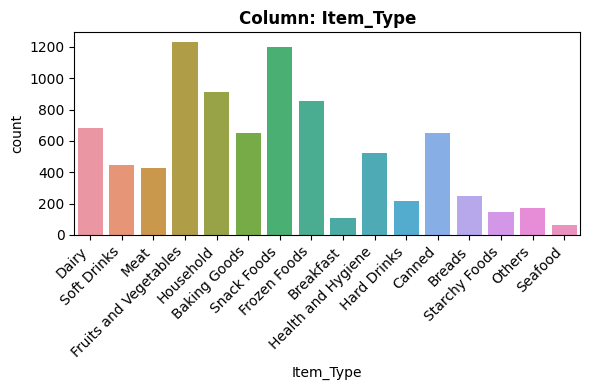

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [388]:
# Plotting univariate graph
explore_categorical(df, 'Item_Type')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * *0, 0.0%*

* Is the feature constant or quasi-constant?
  * *It is not constant or quasi-constant*

* What is the cardinality? Is it high (>10)?
  * 16, High


* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
  * NO, Item_Type determine the increase or decrease of the Outlet_Item sale

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

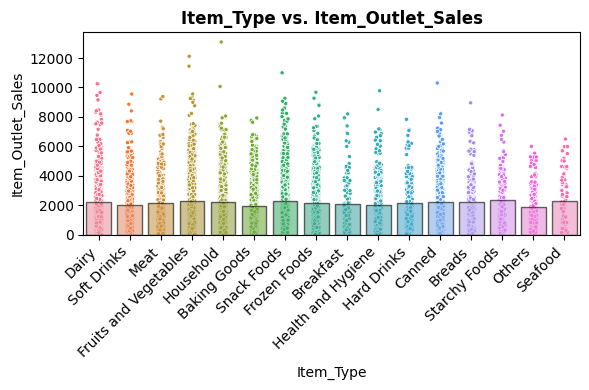

In [389]:
# Ploting Multivariate target(Item_Outlet_Sales) vs Item_Type
plot_categorical_vs_target(df, 'Item_Type','Item_Outlet_Sales' )


* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Item_Fat_Content           
Feature - Item_Fat_Content
Description - Whether the product is low-fat or regular

In [390]:
# Checking data type
df['Item_Fat_Content'].dtype


dtype('O')

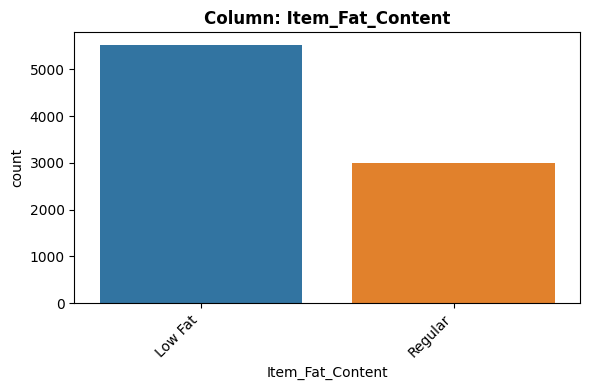

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [391]:
# ploting graph
explore_categorical(df, 'Item_Fat_Content')


* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * 0 null with 0.0%

* Is the feature constant or quasi-constant?
  * not

* What is the cardinality? Is it high (>10)?
  * 2 - low

* Would we know this feature before the target is determined?
  * yes

* Is there a business case/understanding reason to exclude based on our business case?
  * No, Item_Outlet sales can increase or decrease base on the type of the feature


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

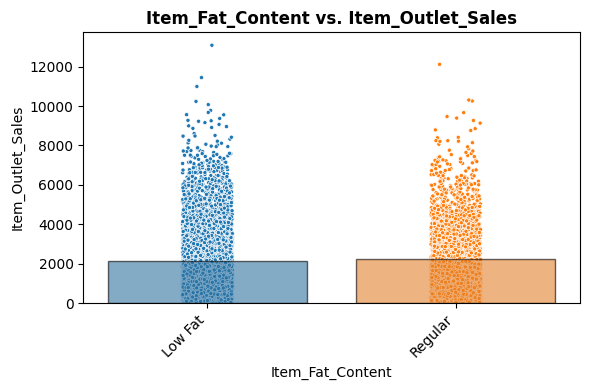

In [392]:
# Multivariate plot target(Item_Outlet_Sales) vs Item_Fat_Content
plot_categorical_vs_target(df, 'Item_Fat_Content','Item_Outlet_Sales' )

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Item_Visibility            
Feature - Item_Visibility
Description - The percentage of total display area of all products in a store allocated to the particular product

In [393]:
# check datatype
df['Item_Visibility'].dtype

dtype('float64')

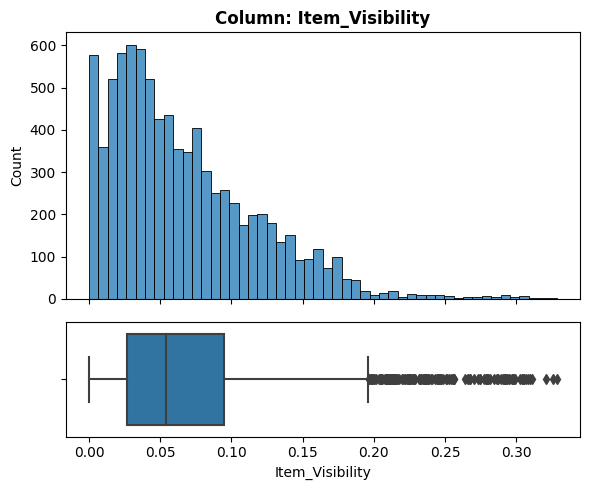

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [394]:
#Ploting Graph
explore_numeric(df, 'Item_Visibility')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Numeric

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * 0 nulls with 0.0%

* Is the feature constant or quasi-constant?
  * Not

* What is the cardinality? Is it high (>10)?
  * it is a numeric feature, so cardinality is not relevent

* Would we know this feature before the target is determined?
  Yes

* Is there a business case/understanding reason to exclude based on our business case?
  * Yes, There is least correlation between Outlet_Item sale and Outlet_Item_Visibility

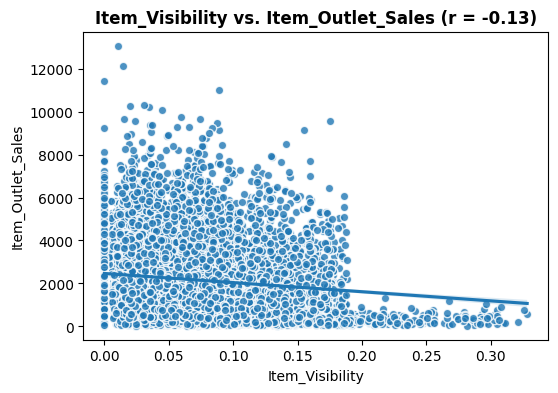

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [395]:
# Multivariate plot Item_Visibility vs Item_Outlet_Sales
plot_numeric_vs_target(df, 'Item_Visibility', 'Item_Outlet_Sales')

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * No

* Does this feature appear to be a predictor of the target?
  * Somehow Yes

## Item_MRP                   
Feature - Item_MRP
Description - Maximum Retail Price (list price) of the product

In [396]:
#Checking datatype
df['Item_MRP'].dtype

dtype('float64')

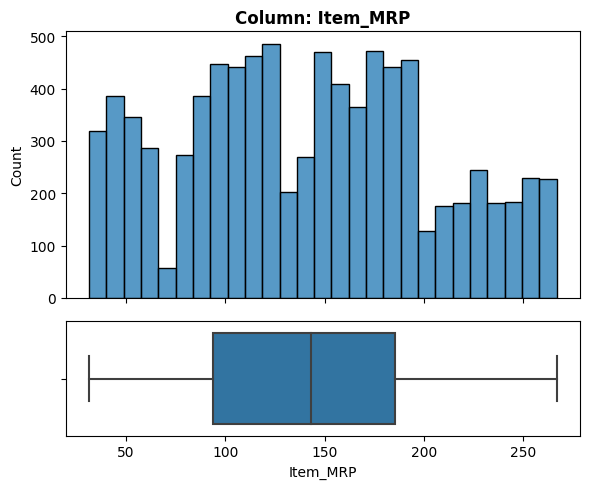

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [397]:
explore_numeric(df, 'Item_MRP')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Numeric

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * 0 nulls with 0.0%

* Is the feature constant or quasi-constant?
  * not

* What is the cardinality? Is it high (>10)?
  * not relevent - numeric feature

* Would we know this feature before the target is determined?
  * No

* Is there a business case/understanding reason to exclude based on our business case?
  * No

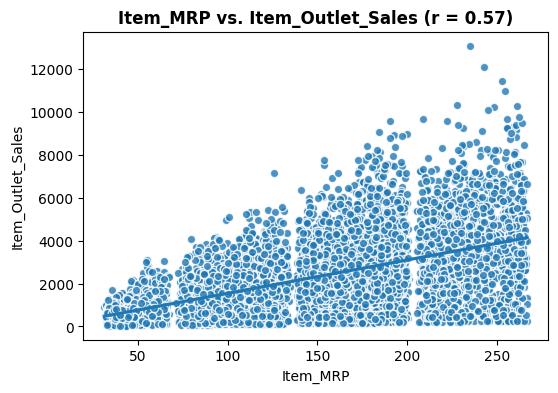

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [398]:
# Item_Outlet_Sales vs Item_MRP
plot_numeric_vs_target(df, 'Item_MRP','Item_Outlet_Sales')

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Outlet_Identifier

Feature - Outlet_Identifier
Describtion - Store ID

In [399]:
#Check Data type
df['Outlet_Identifier'].dtype

dtype('O')

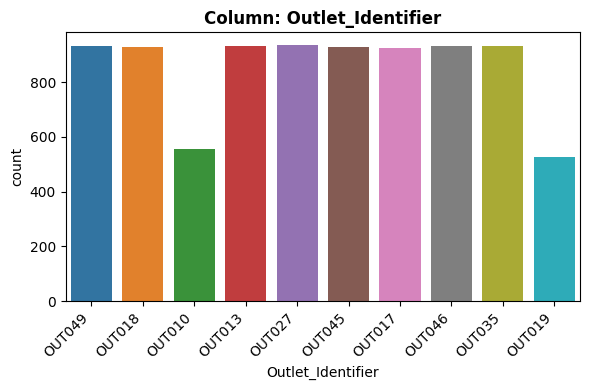

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [400]:
#plot categorical

explore_categorical(df,'Outlet_Identifier')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Ordinal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * No null values , no need to impute

* Is the feature constant or quasi-constant?
  *Not

* What is the cardinality? Is it high (>10)?
  * not >10

* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
   * No

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

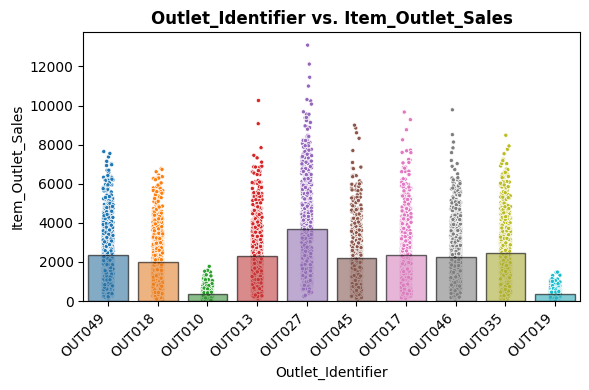

In [401]:
 # Multivariate Item_Outlet_Sales vs Outlet_Identifier
plot_categorical_vs_target(df, 'Outlet_Identifier','Item_Outlet_Sales' )

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Outlet_Establishment_Year  
Feature - Outlet_Establishment_Year
Description - The year in which store was established

In [402]:
#Check dtype
df['Outlet_Establishment_Year'].dtype

dtype('int64')

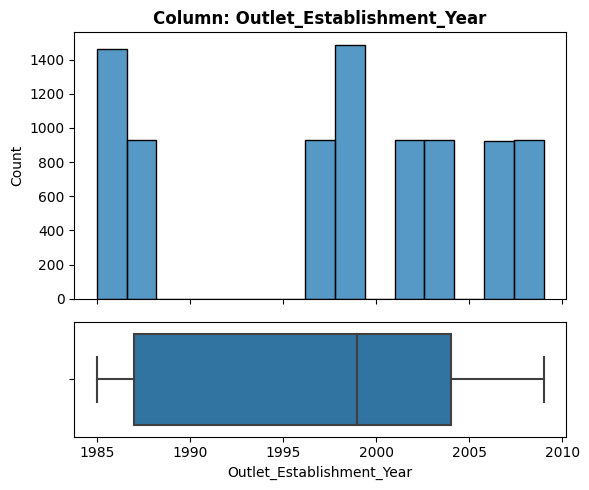

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [403]:
# explore Numeric feture
explore_numeric(df, 'Outlet_Establishment_Year')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * numeric

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * 0 with 0.0%

* Is the feature constant or quasi-constant?
  * Not

* What is the cardinality? Is it high (>10)?
  * Not applicable - numeric feature

* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
  * Yes - least correlated

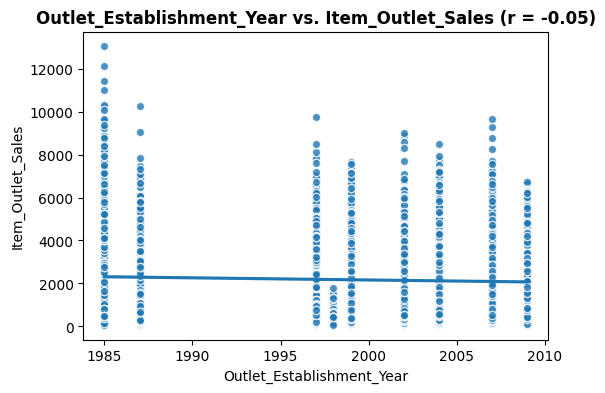

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [404]:
# Outlet_Establishment_Year vs Item_Outlet_Sales
plot_numeric_vs_target(df, 'Outlet_Establishment_Year','Item_Outlet_Sales')

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * No

* Does this feature appear to be a predictor of the target?
  * No

## Outlet_Location_Type

Feature - Outlet_Location_Type
Description - The type of area in which the store is located

In [405]:
# data type
df['Outlet_Location_Type'].dtype

dtype('O')

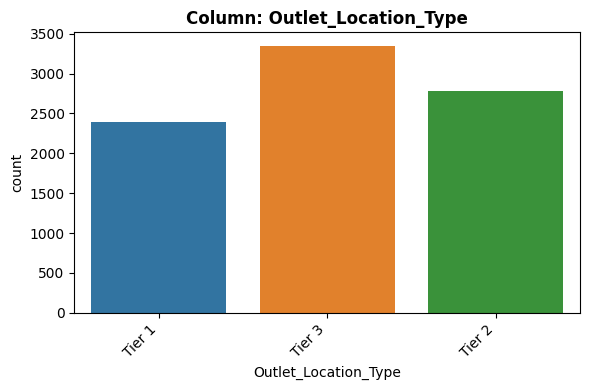

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [406]:
#explore categorical
explore_categorical(df,'Outlet_Location_Type')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * 0, 0.0%

* Is the feature constant or quasi-constant?
  * Not

* What is the cardinality? Is it high (>10)?
  * 3 - low

* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
  No

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

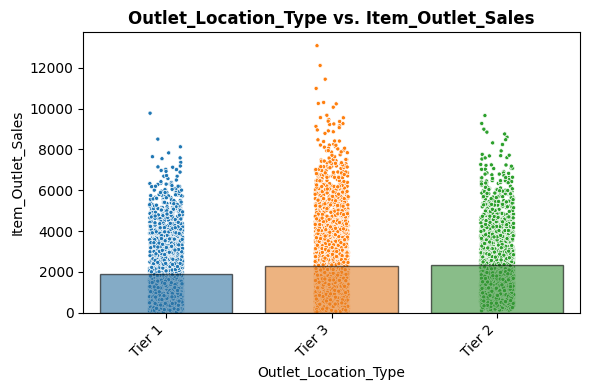

In [407]:
# Outlet_Location_Type vs Item_Outlet_Sales
plot_categorical_vs_target(df, 'Outlet_Location_Type','Item_Outlet_Sales' )

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Outlet_Type

Feature - Outlet_Type
Description - Whether the outlet is a grocery store or some sort of supermarket

In [408]:
# Checking datatype
df['Outlet_Type'].dtype

dtype('O')

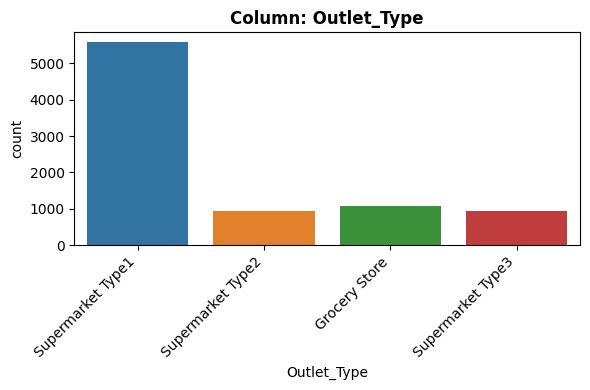

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [409]:
#  explore Outlet_Type
explore_categorical(df,'Outlet_Type')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  0 with 0.0%

* Is the feature constant or quasi-constant?
  * Not

* What is the cardinality? Is it high (>10)?
  4 -  low

* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
  * No

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

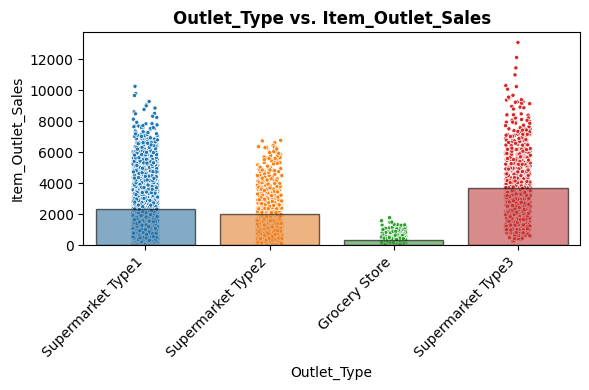

In [410]:
# Item_Outlet_Sales vs Outlet_Type
plot_categorical_vs_target(df, 'Outlet_Type','Item_Outlet_Sales')

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Outlet_Size

Feature - Outlet_Size
Description - The size of the store in terms of ground area covered

In [411]:
# Checking data type of the feature
df['Outlet_Size'].dtype

dtype('O')

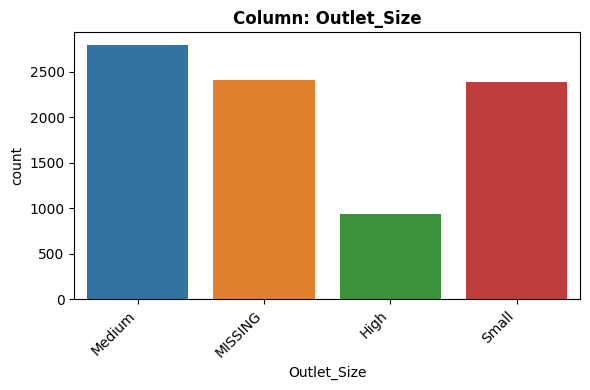

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [412]:
# Ploting Outlet_Size
explore_categorical(df,'Outlet_Size')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Ordinal

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  * 2410 with 28.28%

* Is the feature constant or quasi-constant?
  * Not

* What is the cardinality? Is it high (>10)?
  * 4 - low

* Would we know this feature before the target is determined?
  * Yes

* Is there a business case/understanding reason to exclude based on our business case?
  * No

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

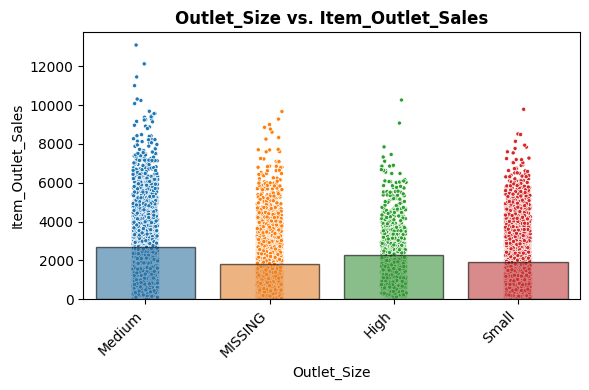

In [413]:
#Item_Outlet_Sales vs Outlet_Size
plot_categorical_vs_target(df,'Outlet_Size','Item_Outlet_Sales' )

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes

* Does this feature appear to be a predictor of the target?
  * Yes

## Item_Outlet_Sales

Feature - Item_Outlet_Sales
Description - Sales of the product in the particular store. This is the target variable to be predicted.

In [414]:
# data type of Item_Outlet_Sales
df['Item_Outlet_Sales'].dtype

dtype('float64')

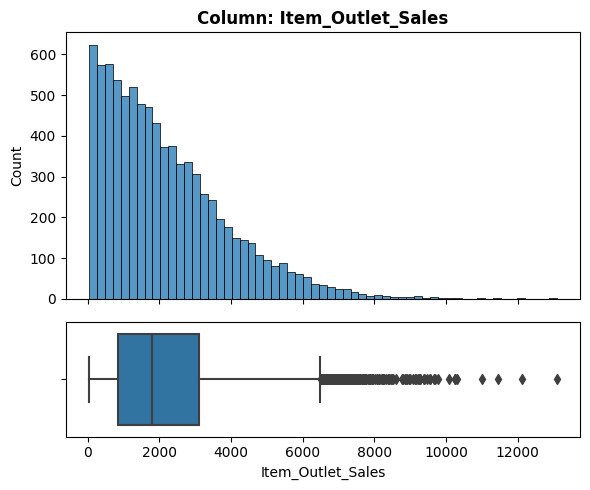

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales', ylabel='Count'>,
        <Axes: xlabel='Item_Outlet_Sales'>], dtype=object))

In [415]:
# explore Item_Outlet_Sales target
explore_numeric(df, 'Item_Outlet_Sales')

* What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Numeric

* How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *  0, 0.0% no need to impute

* Is the feature constant or quasi-constant?
   Not

* What is the cardinality? Is it high (>10)?
  * Numeric - target value

* Would we know this feature before the target is determined?
  * No - not a feature, it a target

* Is there a business case/understanding reason to exclude based on our business case?
  * Yes

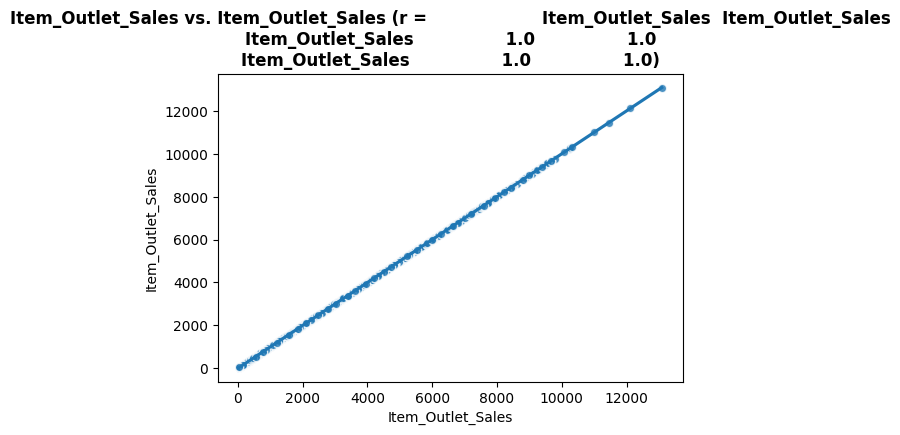

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Outlet_Sales vs. Item_Outlet_Sales (r =                    Item_Outlet_Sales  Item_Outlet_Sales\nItem_Outlet_Sales                1.0                1.0\nItem_Outlet_Sales                1.0                1.0)'}, xlabel='Item_Outlet_Sales', ylabel='Item_Outlet_Sales'>)

In [416]:
# Item_Outlet_Sales vs Item_Outlet_Sales
plot_numeric_vs_target(df, 'Item_Outlet_Sales','Item_Outlet_Sales')

* Based on your business understanding, would you expect this feature to be a predictor of the target?
  * Yes - since it is our target

* Does this feature appear to be a predictor of the target?
  * Yes - It is our target